In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import malaya

model = malaya.dependency.transformer(model = 'xlnet', quantized = True)
pos = malaya.pos.transformer(model = 'xlnet', quantized = True)

In [15]:
t = 'Dirk Jan Klaas Huntelaar merupakan pemain bola sepak Belanda yang bermain di posisi penyerang'

In [5]:
tokenizer = malaya.preprocessing.TOKENIZER().tokenize

In [16]:
graph, tagging, indexing = model.predict(' '.join(tokenizer(t)))

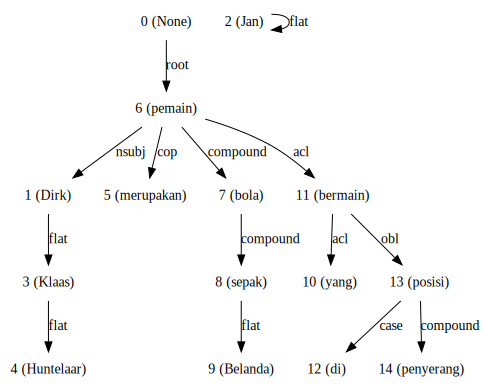

In [17]:
graph.to_graphvis()

In [18]:
def reset_t(tagging):
    t = tagging.copy()
    for i in range(len(t)):
        t[i] = [t[i][0], 2]
    return t

def augment_3(t, graph, selected = ['compound', 'flat']):
    l = list(graph.nodes.items())
    for no, n in enumerate(l[1:]):
        n = n[1]
        if n['rel'] in selected and n['address'] - 1 == n['head']:
            if n['word'] == t[n['head'] - 1][0]:
                print('repeated word, continue')
                continue
            c = t[n['head'] - 1].copy()
            c[1] = 3
            t[n['head'] - 1] = [t[n['address'] - 1][0], 3]
            t[n['address'] - 1] = c
        
    return t

In [21]:
t = reset_t(tagging)
t

[['Dirk', 2],
 ['Jan', 2],
 ['Klaas', 2],
 ['Huntelaar', 2],
 ['merupakan', 2],
 ['pemain', 2],
 ['bola', 2],
 ['sepak', 2],
 ['Belanda', 2],
 ['yang', 2],
 ['bermain', 2],
 ['di', 2],
 ['posisi', 2],
 ['penyerang', 2]]

In [22]:
augment_3(t, graph)

[['Dirk', 2],
 ['Jan', 2],
 ['Huntelaar', 3],
 ['Klaas', 3],
 ['merupakan', 2],
 ['bola', 3],
 ['sepak', 3],
 ['Belanda', 3],
 ['pemain', 3],
 ['yang', 2],
 ['bermain', 2],
 ['di', 2],
 ['penyerang', 3],
 ['posisi', 3]]